# Objective

- Which product categories have the highest profit margin in the superstore?
- Which are the Top 10 products by sales? 
- Which are the Most Profitable Category and Sub-Category?
- What is the most preferred Shipping Mode?
- What is the preffered order priority?
- Which region has the highest sales and is there a significant difference between the highest and lowest sales?
- What are the top 10 profitable countries?
- How do sales vary by product category during different months of the year?
- How do companies profit vary by Weekdays compared to weekend?
- What is the overall sales trend? 

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
import warnings
warnings.filterwarnings('ignore')

# Load superstore dataset

In [200]:
df =pd.read_excel('superstore_sales.xlsx')

# Check first 5 rows of the dataset

In [202]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium,2011


# Check last 5 rows of the dataset

In [266]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.200,4.519,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.000,0.420,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.000,12.360,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.000,0.560,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.200,-0.605,0.170,Medium,2014


# Check the column names

In [8]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

# Check how many rows and columns this dataset has

In [9]:
df.shape

(51290, 21)

# Get the information of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

# Check null values in the dataset

In [12]:
df.isnull().sum()
# This dataset has not null values

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

# Check duplicate values

In [14]:
df.duplicated().sum()
# Dataset has no duplicate values

0

# Get overall statistics about the dataset

In [15]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


# Exploratory Data Analysis
- Q1. Which product categories have the highest profit margin in the superstore?

In [16]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [24]:
Highest_profit_Category=df.groupby('category')['profit'].sum()
Highest_profit_Category

category
Furniture          286782.25380
Office Supplies    518473.83430
Technology         663778.73318
Name: profit, dtype: float64

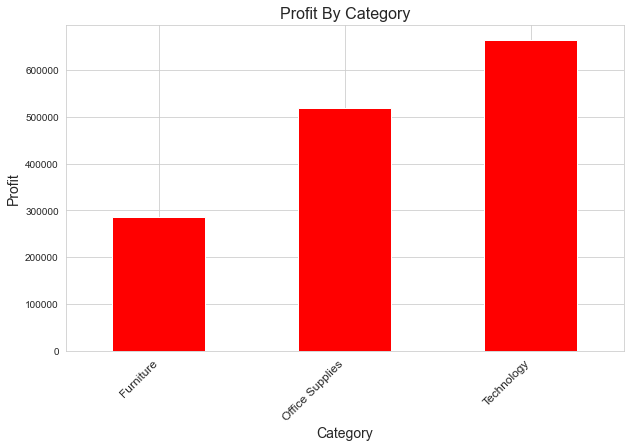

In [205]:
Highest_profit_Category=df.groupby('category').sum()['profit']
plt.figure(figsize=(10, 6))
Highest_profit_Category.plot(kind='bar', color='red')
plt.title("Profit By Category", fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.show()

# Conclusion: Technology products has the highest profit margin out of the 3 categories.

- Q2. Which are the Top 10 products by sales? 

In [40]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [41]:
Top10_product = pd.DataFrame(df.groupby('product_name').sum()['sales'])

In [42]:
Top10_product = Top10_product.sort_values('sales', ascending=False)

In [43]:
# Here is the list of top 10 products by sale
Top10_product[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


- Q3. Which are the Most Profitable Category and Sub-Category?

In [38]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [44]:
most_profitable_cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

In [45]:
most_profitable_cat_subcat=most_profitable_cat_subcat.sort_values(['category', 'profit'], ascending=False)

In [47]:
# List of Most profitable Category and Subcategory
most_profitable_cat_subcat

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

- Q4. What is the most preferred Shipping Mode?

In [48]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [53]:
ship_mode_counts=df['ship_mode'].value_counts()
ship_mode_counts

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

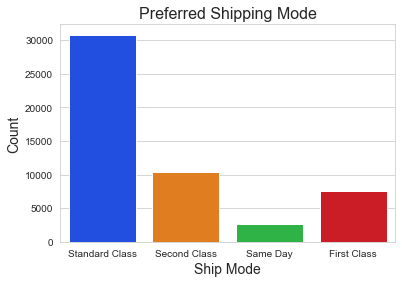

In [206]:
sns.set_style("whitegrid")

bright_palette = sns.color_palette("bright")
sns.countplot(df["ship_mode"], palette=bright_palette)

plt.title('Preferred Shipping Mode', fontsize=16)
plt.xlabel('Ship Mode', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Conclusion: Standard Class is the most preffered shipping mode.

- Q5. What is the preffered order priority?

In [186]:
preffered_order_priority=df['order_priority'].value_counts()
preffered_order_priority

Medium      29433
High        15501
Critical     3932
Low          2424
Name: order_priority, dtype: int64

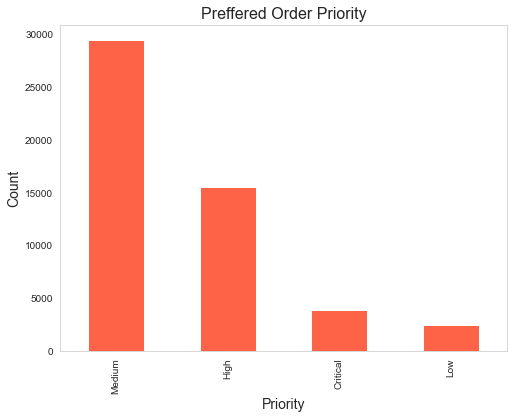

In [204]:
plt.figure(figsize=(8, 6))
preffered_order_priority.plot(kind='bar', color='Tomato', grid=False)
plt.title('Preffered Order Priority', fontsize=16)
plt.xlabel('Priority', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Conclusion: Medium is the most preffered order priority

- Q6. Which region has the highest sales and is there a significant difference between the highest and lowest sales?

In [188]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'order_month', 'month_name', 'order_day', 'month_year'],
      dtype='object')

In [189]:
df.groupby('region')['sales'].sum()
# Results are coming in exponential format. We need to convert it to floating point.

region
Africa            783773.211
Canada             66928.170
Caribbean         324280.861
Central          2822302.520
Central Asia      752826.567
EMEA              806161.311
East              678781.240
North            1248165.603
North Asia        848309.781
Oceania          1100184.612
South            1600907.041
Southeast Asia    884423.169
West              725457.824
Name: sales, dtype: float64

In [67]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' %x)

In [87]:
reg_sales=df.groupby('region')['sales'].sum()
reg_sales_sorted = reg_sales.sort_values()
reg_sales_sorted

region
Canada             66928.170
Caribbean         324280.861
East              678781.240
West              725457.824
Central Asia      752826.567
Africa            783773.211
EMEA              806161.311
North Asia        848309.781
Southeast Asia    884423.169
Oceania          1100184.612
North            1248165.603
South            1600907.041
Central          2822302.520
Name: sales, dtype: float64

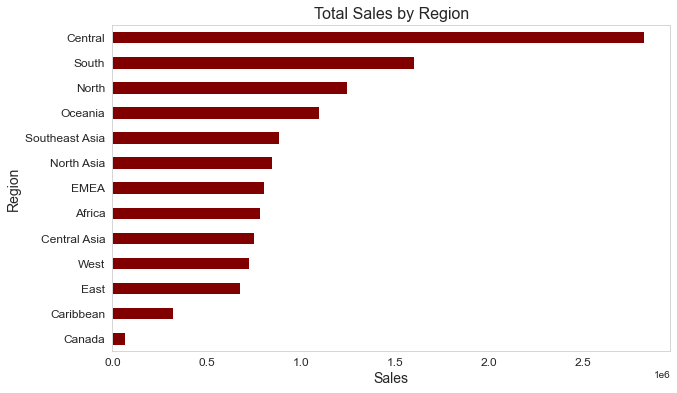

In [207]:
plt.figure(figsize=(10, 6))
reg_sales_sorted.plot(kind='barh', color="maroon", grid=False)  
plt.title("Total Sales by Region", fontsize=16)  
plt.xlabel("Sales", fontsize=14)  
plt.ylabel("Region", fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()
# The highest sales are from Central Region and lowest in Canada. There is a significant difference between 
# sales among these two Region.


- Q7. What are the top 10 profitable countries?

In [225]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [236]:
top10_profitable_countries=df.groupby('country')['profit'].sum()
top10_profitable_countries_sorted=top10_profitable_countries.sort_values(ascending=False)
top10_profitable_countries_sorted[:10]

country
United States    286397.022
China            150683.085
India            129071.835
United Kingdom   111900.150
France           109029.003
Germany          107322.821
Australia        105484.963
Mexico           102818.098
Spain             54390.120
El Salvador       42023.243
Name: profit, dtype: float64

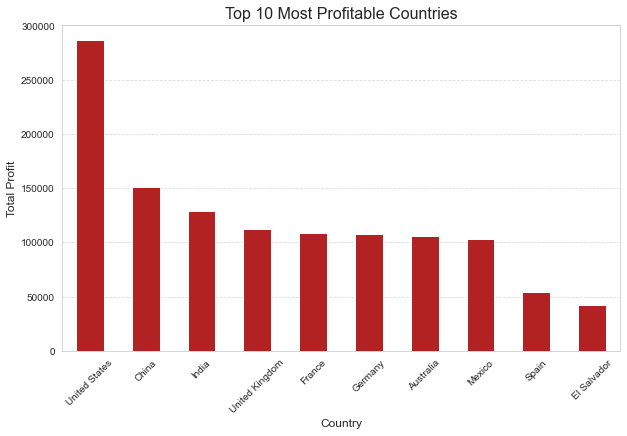

In [265]:
plt.figure(figsize=(10, 6))
top10_profitable_countries_sorted[:10].plot(kind='bar', grid=False, color='#B22222')

plt.title('Top 10 Most Profitable Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Conclusion: The analysis reveals the top 10 most profitable countries, with the United States 
# ranking first and China second.

- Q8. How do sales vary by product category during different months of the year?

In [190]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'order_month', 'month_name', 'order_day', 'month_year'],
      dtype='object')

In [96]:
df['order_month']=pd.DatetimeIndex(df['order_date']).month
df['order_month']

0         1
1         1
2         1
3         1
4         1
         ..
51285    12
51286    12
51287    12
51288    12
51289    12
Name: order_month, Length: 51290, dtype: int64

In [97]:
# Mapping month names to numeric values to text
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Map the numeric values to month names and create a new column
df['month_name'] = df['order_month'].map(month_map)

In [98]:
df['month_name']

0        Jan
1        Jan
2        Jan
3        Jan
4        Jan
        ... 
51285    Dec
51286    Dec
51287    Dec
51288    Dec
51289    Dec
Name: month_name, Length: 51290, dtype: object

In [100]:
month_sales=df.groupby('month_name')['sales'].sum()
month_sales

month_name
Apr    698561.212
Aug   1293833.165
Dec   1580780.773
Feb    543739.380
Jan    675133.672
Jul    749381.837
Jun   1269716.754
Mar    770500.941
May    904012.338
Nov   1551277.342
Oct   1168184.386
Sep   1437380.110
Name: sales, dtype: float64

In [102]:
month_sales_ordered = month_sales.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


In [103]:
month_sales_ordered

month_name
Jan    675133.672
Feb    543739.380
Mar    770500.941
Apr    698561.212
May    904012.338
Jun   1269716.754
Jul    749381.837
Aug   1293833.165
Sep   1437380.110
Oct   1168184.386
Nov   1551277.342
Dec   1580780.773
Name: sales, dtype: float64

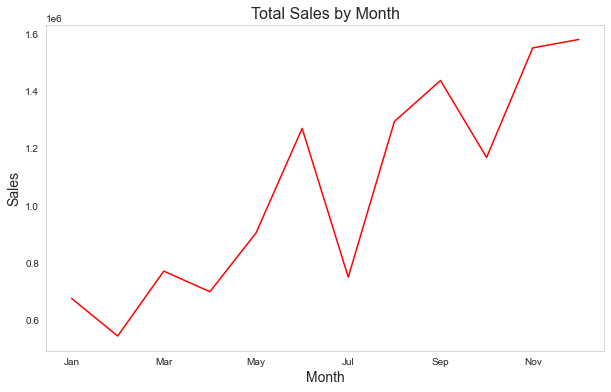

In [208]:
plt.figure(figsize=(10, 6))
month_sales_ordered.plot(kind='line', grid=False, color="red")

plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()

# Conclusion: Sales are higher during November and December.

- Q9. How do companies profit vary by Weekdays compared to weekend?

In [113]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'order_month', 'month_name'],
      dtype='object')

In [115]:
df['order_day']=pd.DatetimeIndex(df['order_date']).day_name()
df['order_day']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
51285    Wednesday
51286    Wednesday
51287    Wednesday
51288    Wednesday
51289    Wednesday
Name: order_day, Length: 51290, dtype: object

In [122]:
day_profit=df.groupby('order_day')['profit'].sum()
day_profit_ordered = day_profit.reindex(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
day_profit_ordered

order_day
Saturday    137489.068
Sunday       29531.313
Monday      251746.556
Tuesday     252741.924
Wednesday   242405.562
Thursday    278366.432
Friday      276753.967
Name: profit, dtype: float64

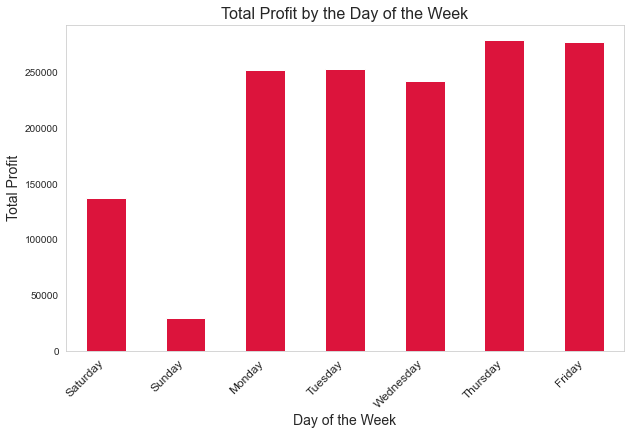

In [209]:
plt.figure(figsize=(10, 6))
day_profit_ordered.plot(kind='bar', grid=False, color="crimson")

plt.title('Total Profit by the Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

# Conclusion: The companies profits are more on weekdays compare to weekends.

- Q10. What is the overall sales trend? 

In [135]:
df["order_date"].max()

Timestamp('2014-12-31 00:00:00')

In [136]:
df["order_date"].min()

Timestamp('2011-01-01 00:00:00')

In [137]:
df["month_year"]=df['order_date'].apply(lambda x:x.strftime('%y-%m'))

In [138]:
df["month_year"]

0        11-01
1        11-01
2        11-01
3        11-01
4        11-01
         ...  
51285    14-12
51286    14-12
51287    14-12
51288    14-12
51289    14-12
Name: month_year, Length: 51290, dtype: object

In [139]:
sales_trend = df.groupby("month_year").sum()["sales"].reset_index()

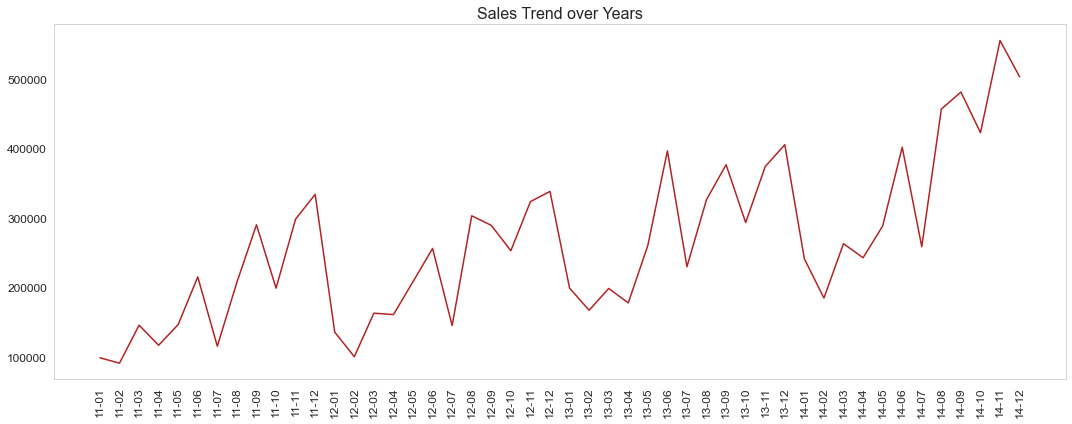

In [147]:
plt.figure(figsize=(15, 6))
plt.plot(sales_trend["month_year"], sales_trend["sales"], color='Firebrick')  

plt.xticks(rotation='vertical', size=12)
plt.title('Sales Trend over Years', fontsize=16)
plt.yticks(fontsize=12)
plt.grid(False)  
plt.tight_layout()
plt.show()

# Conclusion: There is a clear increasing trend in total sales over the years.